IMPORTANT NOTE: This notebook will not work without the data. You need to run the file 'data_extraction_and_preprocessing.py' first.

In [3]:
#import the necessary packages
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator

# Get the data

In [4]:
train_df = pd.read_csv('train.csv')
val_df = pd.read_csv('val.csv')
test_df = pd.read_csv('test.csv')

# Preprocess the images

In [5]:
BATCH_SIZE = 32
IMG_HEIGHT = 224
IMG_WIDTH = 224

In [6]:
#rescale the images
trainGenerator = ImageDataGenerator(rescale=1./255.)
valGenerator = ImageDataGenerator(rescale=1./255.)
testGenerator = ImageDataGenerator(rescale=1./255.)

#convert them into a dataset
trainDataset = trainGenerator.flow_from_dataframe(
  dataframe=train_df,
  class_mode="binary",
  x_col="image",
  y_col="label",
  batch_size=BATCH_SIZE,
  seed=42,
  shuffle=True,
  target_size=(IMG_HEIGHT,IMG_WIDTH) #set the height and width of the images
)

valDataset = valGenerator.flow_from_dataframe(
  dataframe=val_df,
  class_mode='binary',
  x_col="image",
  y_col="label",
  batch_size=BATCH_SIZE,
  seed=42,
  shuffle=True,
  target_size=(IMG_HEIGHT,IMG_WIDTH)
)

testDataset = testGenerator.flow_from_dataframe(
  dataframe=test_df,
  class_mode='binary',
  x_col="image",
  y_col="label",
  batch_size=BATCH_SIZE,
  seed=42,
  shuffle=True,
  target_size=(IMG_HEIGHT,IMG_WIDTH)
)
    

Found 5173 validated image filenames belonging to 2 classes.
Found 739 validated image filenames belonging to 2 classes.
Found 1478 validated image filenames belonging to 2 classes.


In [7]:
images, labels = next(iter(testDataset))

In [8]:
print('Batch shape: ', images.shape)
print('Label shape: ', labels.shape)

Batch shape:  (32, 224, 224, 3)
Label shape:  (32,)


Label:  1.0


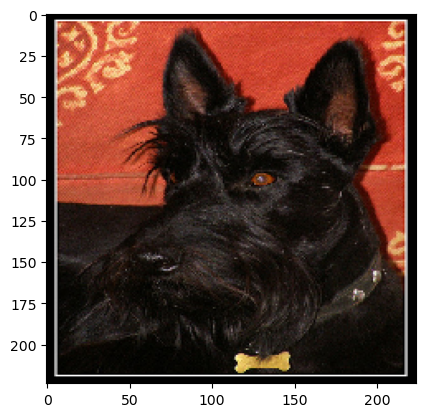

In [9]:
plt.imshow(images[3])
print('Label: ', labels[3])

# Build the model

In [10]:
#build the model
model = keras.Sequential([
    keras.layers.InputLayer(input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(256, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(512, (3, 3), activation='relu'),
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dense(1, activation='sigmoid')
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 256)       295168    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 256)      0

# Train the model

In [12]:
#compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
epochs=1

#train the model
history = model.fit(trainDataset, epochs=epochs, validation_data=(valDataset))

  3/162 [..............................] - ETA: 12:39 - loss: 0.7281 - accuracy: 0.5625

KeyboardInterrupt: 

# Visualice the performance of the training process

In [ ]:
#visualize the model's training performance
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'])
plt.show()

# Evaluate the model

In [ ]:
#evaluate the model on the test dataset
loss, acc = model.evaluate(testDataset)

In [ ]:
print('Loss:', loss)
print('Accuracy:', acc)

In [ ]:
img = plt.imread('pexels-cat-predict.jpg')
plt.imshow(img)

In [ ]:
def preprocess(image):
    img_resize = tf.image.resize(image, [IMG_HEIGHT, IMG_WIDTH])
    img_norm = img_resize / 255
    return img_norm

img = tf.reshape(img, (-1, IMG_HEIGHT, IMG_HEIGHT, 3))
img = preprocess(img)
model.predict(img)
